**<p style="font-size:22px">Rain in Australia</p>**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import windrose
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon

In [4]:
# Install Missing Libraries
# pip install folium

**<p style="font-size:18px">Reading in csv file</p>**

First, we used the .read_csv() method to read the csv file. A relative file path is used.
 Afterwards, we display the dataframe to get the first impression of our given data.

In [5]:
weather_df = pd.read_csv("weatherAUS.csv")

In [6]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**<p style="font-size:22px">1. Research question:</p>**

**<p style="font-size:18px">What is the seasonal and regional variability of weather factors across Australia and their relationship?</p>**


<p style="font-size:18px">For the first research question we do the following data processing:</p>

**<p style="font-size:18px">Correcting location names</p>**

First, we are correcting the location names by adding to two worded strings a space. This is needed in order to get the right geographical data for the locations.

In [7]:
def correct_location_names(df):
    df['Location'] = df['Location'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)
    return df

In [8]:
correct_location_names(weather_df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**<p style="font-size:18px">Adding geo data</p>**

Next, we are adding the geographical data in form of coordinates (Latitude and Longitude) to our dataframe. This is done with the help of geopy library which is a library for geocoding addresses and working with geographic information.

In [9]:
def add_geo_data(df):
    cities = df['Location'].unique()
    # geolocator = Nominatim(user_agent="geoapiExercises")
    geolocator = Photon(user_agent="measurements")
    df_temp = pd.DataFrame(columns=['Location', 'Latitude', 'Longitude'])
    for city in cities:
        location = geolocator.geocode(city + ',' + "Australia")
        if location is not None:
            city = city.replace('\'', '')
            new_row = {'Location': city, 'Latitude': location.latitude, 'Longitude': location.longitude}
            df_temp = pd.concat([df_temp, pd.DataFrame([new_row])], ignore_index=True)
    df_merged = pd.merge(df, df_temp[['Location', 'Latitude', 'Longitude']], on='Location', how='left')
    df_merged['Latitude'] = df_merged['Latitude'].astype(float)
    df_merged['Longitude'] = df_merged['Longitude'].astype(float)
    return df_merged

In [10]:
weather_df = add_geo_data(weather_df)

In [11]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.073713,146.913533
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.073713,146.913533
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.073713,146.913533
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.073713,146.913533
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.073713,146.913533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,-25.344857,131.032517
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,-25.344857,131.032517
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,-25.344857,131.032517
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,-25.344857,131.032517


**<p style="font-size:18px">Converting wind directions</p>**

In order to create a fitting graph for the wind information, we are converting the given wind directions into degrees. 22.5 degrees steps are used to cover a complete circle in the end.
The wind directions are converted as follows:
<table style="border: 1px solid white; padding: 10px;">
  <tr>
    <td>
      
      N = 0 degrees, NNE = 22.5 degrees, NE = 45 degrees, ENE = 67.5 degrees,
    
      E = 90 degrees, ESE = 112.5 degrees, SE = 135 degrees, SSE = 157.5 degrees,
    
      S = 180 degrees, SSW = 202.5 degrees, SW = 225 degrees, WSW = 247.5 degrees,
    
      W = 270 degrees, WNW = 292.5 degrees, NW = 315 degrees, NNW = 337.5 degrees
    
  </tr>
</table>


In [12]:
def convert_wind_dir_to_degrees(wind_dir):
    wind_dir_mapping = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
                        'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
                        'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
                        'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
    return wind_dir_mapping.get(wind_dir, np.nan)

Since a function is used, the different data can be converted individually. We have three different columns with a wind direction in it, so we can easily convert them.

In [13]:
weather_df['WindGustDirConvert'] = weather_df['WindGustDir'].apply(convert_wind_dir_to_degrees)
weather_df['WindDir9amConvert'] = weather_df['WindDir9am'].apply(convert_wind_dir_to_degrees)
weather_df['WindDir3pmConvert'] = weather_df['WindDir3pm'].apply(convert_wind_dir_to_degrees)

In [14]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,WindGustDirConvert,WindDir9amConvert,WindDir3pmConvert
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,NaN,16.9,21.8,No,No,-36.073713,146.913533,270.0,270.0,292.5
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,17.2,24.3,No,No,-36.073713,146.913533,292.5,337.5,247.5
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,2.0,21.0,23.2,No,No,-36.073713,146.913533,247.5,270.0,247.5
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,18.1,26.5,No,No,-36.073713,146.913533,45.0,135.0,90.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,8.0,17.8,29.7,No,No,-36.073713,146.913533,270.0,67.5,315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,NaN,10.1,22.4,No,No,-25.344857,131.032517,90.0,135.0,67.5
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,NaN,10.9,24.5,No,No,-25.344857,131.032517,337.5,135.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,NaN,12.5,26.1,No,No,-25.344857,131.032517,0.0,135.0,292.5
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,2.0,15.1,26.0,No,No,-25.344857,131.032517,135.0,157.5,0.0


With regard to our visuals, we are adding some new columns which are important for the display of graphs.

**<p style="font-size:18px">Average temperature</p>**

We are beginning by adding the average temperature per day. It is calculated with the mean of MinTemp and MaxTemp values. As a result we get an average temperature of the day.

In [15]:
weather_df['AverageTemp'] = weather_df[['MinTemp', 'MaxTemp']].mean(axis=1)

In [16]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,WindGustDirConvert,WindDir9amConvert,WindDir3pmConvert,AverageTemp
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,16.9,21.8,No,No,-36.073713,146.913533,270.0,270.0,292.5,18.15
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,17.2,24.3,No,No,-36.073713,146.913533,292.5,337.5,247.5,16.25
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,21.0,23.2,No,No,-36.073713,146.913533,247.5,270.0,247.5,19.30
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,18.1,26.5,No,No,-36.073713,146.913533,45.0,135.0,90.0,18.60
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,17.8,29.7,No,No,-36.073713,146.913533,270.0,67.5,315.0,24.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,10.1,22.4,No,No,-25.344857,131.032517,90.0,135.0,67.5,13.10
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,10.9,24.5,No,No,-25.344857,131.032517,337.5,135.0,0.0,14.45
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,12.5,26.1,No,No,-25.344857,131.032517,0.0,135.0,292.5,16.15
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,15.1,26.0,No,No,-25.344857,131.032517,135.0,157.5,0.0,17.40


**<p style="font-size:18px">Average humidity</p>**

Next, we are adding the average humidity per day. It is calculated with the mean of Humidity9am and Humidity3pm values. As a result we get an average humidity of the day.

In [17]:
weather_df['AverageHumidity'] = weather_df[['Humidity3pm', 'Humidity9am']].mean(axis=1)

In [18]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,WindGustDirConvert,WindDir9amConvert,WindDir3pmConvert,AverageTemp,AverageHumidity
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,-36.073713,146.913533,270.0,270.0,292.5,18.15,46.5
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,-36.073713,146.913533,292.5,337.5,247.5,16.25,34.5
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,-36.073713,146.913533,247.5,270.0,247.5,19.30,34.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,-36.073713,146.913533,45.0,135.0,90.0,18.60,30.5
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,-36.073713,146.913533,270.0,67.5,315.0,24.90,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,22.4,No,No,-25.344857,131.032517,90.0,135.0,67.5,13.10,37.5
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,24.5,No,No,-25.344857,131.032517,337.5,135.0,0.0,14.45,38.5
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,26.1,No,No,-25.344857,131.032517,0.0,135.0,292.5,16.15,38.5
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,26.0,No,No,-25.344857,131.032517,135.0,157.5,0.0,17.40,37.5


**<p style="font-size:18px">Adding the year and month</p>**

The last columns we are adding to our data frame for the first research question are one for the year and one for the month. We are converting the date column and extract the year and month.

In [19]:
def add_year_month(df):
    # Convert the date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    # Extract the year and month from the date column
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

In [20]:
add_year_month(weather_df)

In [21]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,Latitude,Longitude,WindGustDirConvert,WindDir9amConvert,WindDir3pmConvert,AverageTemp,AverageHumidity,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,No,-36.073713,146.913533,270.0,270.0,292.5,18.15,46.5,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,No,-36.073713,146.913533,292.5,337.5,247.5,16.25,34.5,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,No,-36.073713,146.913533,247.5,270.0,247.5,19.30,34.0,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,No,-36.073713,146.913533,45.0,135.0,90.0,18.60,30.5,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,No,-36.073713,146.913533,270.0,67.5,315.0,24.90,57.5,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,No,-25.344857,131.032517,90.0,135.0,67.5,13.10,37.5,2017,6
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,No,-25.344857,131.032517,337.5,135.0,0.0,14.45,38.5,2017,6
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,No,-25.344857,131.032517,0.0,135.0,292.5,16.15,38.5,2017,6
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,No,-25.344857,131.032517,135.0,157.5,0.0,17.40,37.5,2017,6


**<p style="font-size:18px">New dataframe for sunshine</p>**

With a view to display interesting insights regarding the sunshine, we created a new dataframe with only the locations, months and sunshine values in it. Afterward the NaN values are dropped in order to consider only locations with given data.

In [22]:
weather_sun_df = weather_df.groupby(['Location', 'Month'])['Sunshine'].mean().reset_index()
weather_sun_df= weather_sun_df.dropna(subset=['Sunshine'])

In [23]:
weather_sun_df

,Location,Month,Sunshine
0,Adelaide,1,11.178488
1,Adelaide,2,9.651079
2,Adelaide,3,8.260109
3,Adelaide,4,7.357778
4,Adelaide,5,5.288525
...,...,...,...
583,Woomera,8,8.431447
584,Woomera,9,9.658599
585,Woomera,10,9.781325
586,Woomera,11,9.802632


**<p style="font-size:22px">Output visuals</p>**

**<p style="font-size:18px">Map with locations</p>**

First, we are displaying the location given in our dataframe on map of Australia based on the geographical information. The result will be shown in the browser. Additionally, we are saving it as .html.

In [24]:
def display_locations(df):
    locations_df = df[['Location', 'Latitude', 'Longitude']]
    locations_unique_df = locations_df.drop_duplicates(subset='Location')[['Location', 'Latitude', 'Longitude']]
#Create base map with center of Australia and zoom level 4
    m = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)
    for i, row in locations_unique_df.iterrows():
        folium.Circle(location=[row['Latitude'], row['Longitude']], popup=row['Location'],  color='#ff0000', fill=True, fill_color='#ff0000').add_to(m)
# Showing the map with locations
    m.show_in_browser()
# Saving the map with locations
    m.save("../../output/map_with_locations.html")


In [25]:
# display_locations(weather_df)

With respect to our research question, we have chosen three locations for our following visuals. The selection was made in such a way that one location was chosen from the east, one from the west and one from the center. This should show regional and sessional differences.

Chosen locations: Sydney, Alice Springs, and Perth

**<p style="font-size:18px">Heat matrix average temperature based on MaxTemp</p>**

Next, we are displaying a heat matrix of the average temperature based on the column MaxTemp for individual locations. We are using a function in order to easily choose the location you want to display.

In [26]:
def print_heat_matrix_avg_temperature(df, location):

# Select all data from the location
    df = df.loc[df['Location'].str.contains(location)]
    pivot_table = df.pivot_table(values='MaxTemp', columns='Year', index='Month', aggfunc='mean')
# Create a month name list
    month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                      'November', 'December']
# Change the month numbers to month names
    pivot_table.index = month_name
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', xticklabels=True, yticklabels=True)
    plt.xlabel('Year')
    plt.ylabel('Month')
    plt.title(f" Avg. Max Temperature[°C] of {location}", fontsize=15, color='black')
    plt.show()

Now we are displaying the heat matrix for the locations Sydney, Alice Springs, and Perth.

c:\Users\JASH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


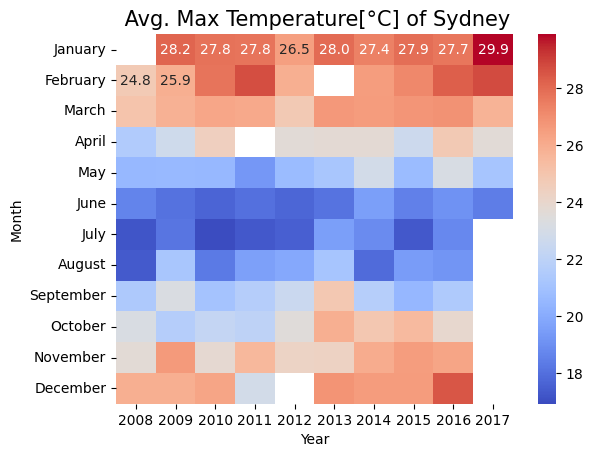

c:\Users\JASH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


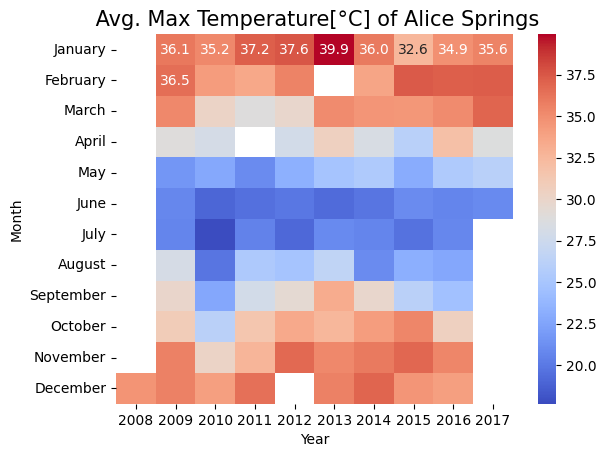

c:\Users\JASH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


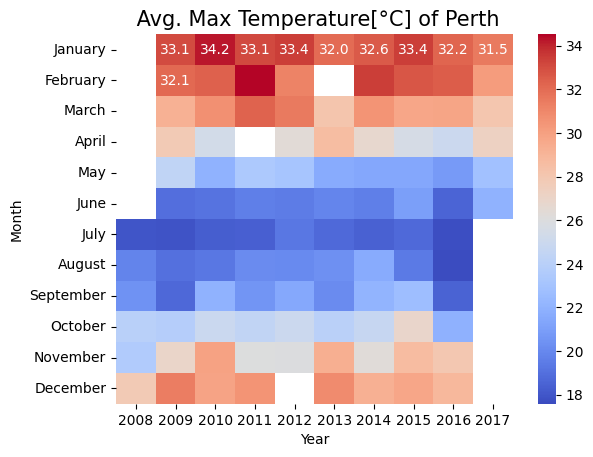

In [27]:
print_heat_matrix_avg_temperature(weather_df, 'Sydney')
print_heat_matrix_avg_temperature(weather_df, 'Alice Springs')
print_heat_matrix_avg_temperature(weather_df, 'Perth')

**<p style="font-size:18px">Average temperature by month based on AverageTemp</p>**

We are showing the monthly average temperature based on the column AverageTemp for individual locations. We are using a function in order to easily choose the location you want to display.

In [28]:
def display_avg_temp(df, location):
    temp_avg = df[df['Location'] == location].groupby(df['Month'])[
        'AverageTemp'].mean()
#Plotting a line chart
    plt.plot(temp_avg.index, temp_avg.values)
    plt.xlabel('Month')
    plt.ylabel('Avg. Temperature [°C] ')
    plt.title(f'Avg. Temperature [°C] in {location} per Month', fontsize=15)
    plt.show()

We are using the function for the average temperature over the month for the locations Sydney, Alice Springs and Perth.

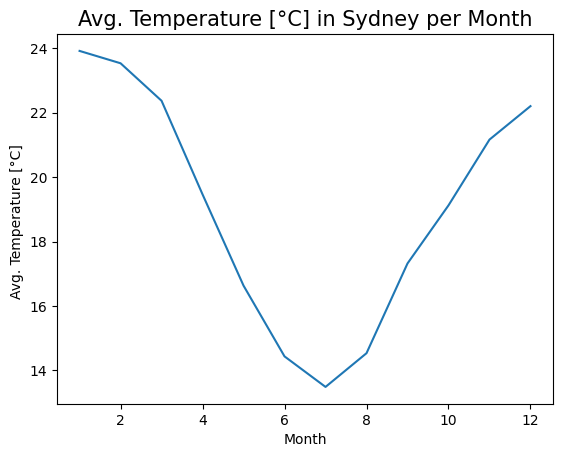

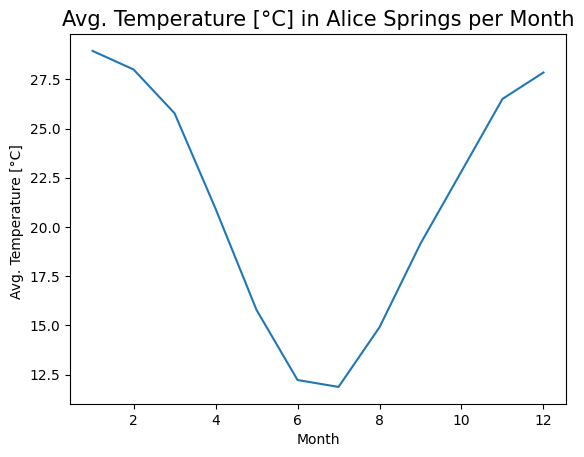

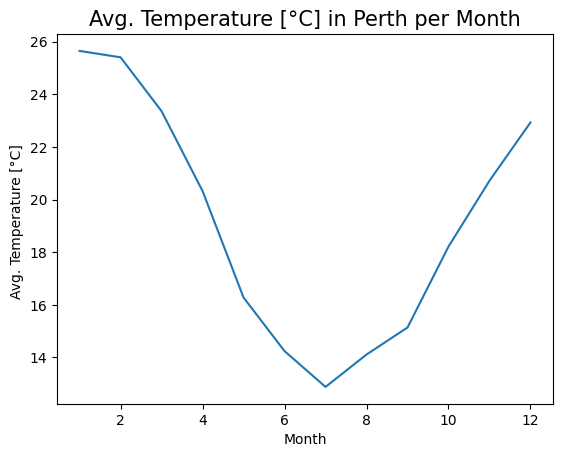

In [29]:
display_avg_temp(weather_df, 'Sydney')
display_avg_temp(weather_df, 'Alice Springs')
display_avg_temp(weather_df, 'Perth')

**<p style="font-size:18px">Average hours of sunshing per month</p>**

In the next step we are presenting the average hours of monthly sunshine for the individual locations. For this visualization the weather_sun_df dataframe is used. We are using a function in order to easily choose the location you want to display.

In [30]:
def plot_sunshine(df, location):
    sunshine_hours = df[df["Location"] == location]
#Drawing a bar chart
    plt.bar(sunshine_hours['Month'], sunshine_hours['Sunshine'], align='center')
    plt.xlabel('Month')
    plt.ylabel('Avg. Sunshine [h] ')
    plt.title(f'Avg. Sunshine [h] in {location} per Month', fontsize=15)
    plt.ylim(4, 12)
    plt.show()

Followingly, the charts for the locations Sydney, Alice Springs, and Perth are shown.

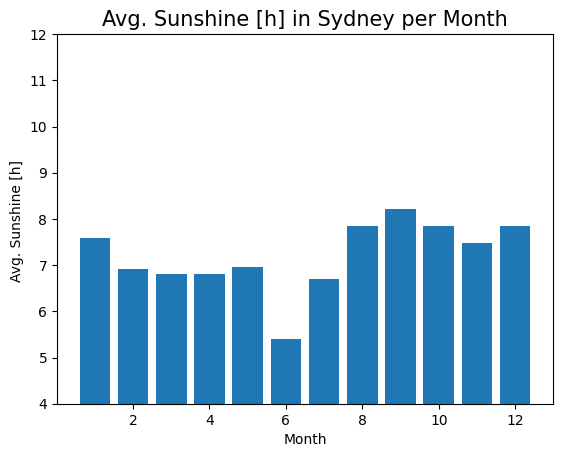

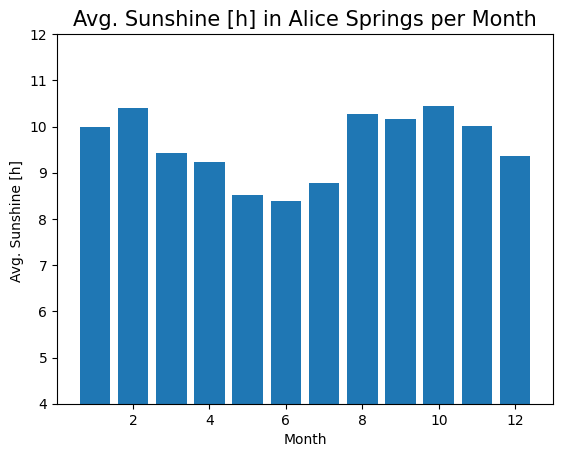

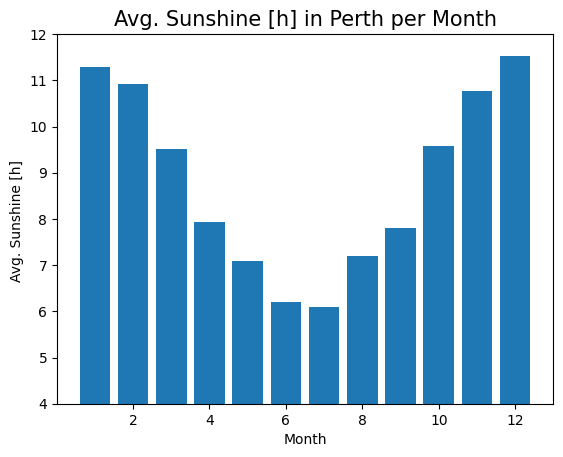

In [31]:
plot_sunshine(weather_sun_df, 'Sydney')
plot_sunshine(weather_sun_df, 'Alice Springs')
plot_sunshine(weather_sun_df, 'Perth')

**<p style="font-size:18px">Heat matrix average rainfall based on Rainfall</p>**

Next, we are visualizing a heat matrix of the average rainfall based on the column Rainfall for the individual locations. We are using a function in order to easily choose the location you want to display.

In [32]:
def print_heat_matrix_avg_rain(df, location):
# Select all data from the location
    df = df.loc[df['Location'].str.contains(location)]
    pivot_table = df.pivot_table(values='Rainfall', columns='Year', index='Month', aggfunc='mean')
# Create a month name list
    month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                  'November', 'December']
# Change the month numbers to month names
    pivot_table.index = month_name
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', xticklabels=True, yticklabels=True)
    plt.xlabel('Year')
    plt.ylabel('Month')
    plt.title(f" Avg. Rainfall [mm] of {location} ", fontsize=15, color='black')
    plt.show()

Again, the function is used for the locations Sydney, Alice Springs, and Perth.

c:\Users\JASH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


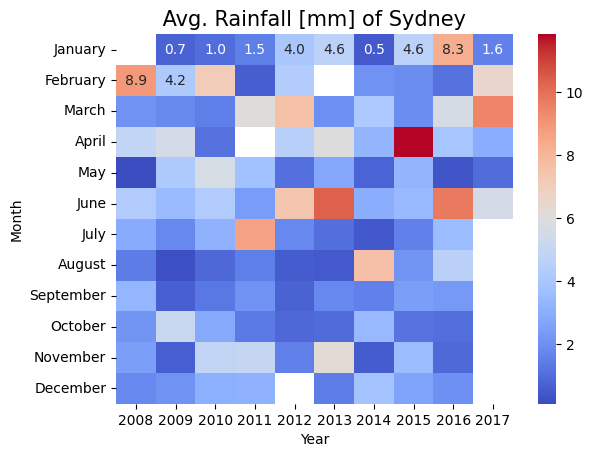

c:\Users\JASH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


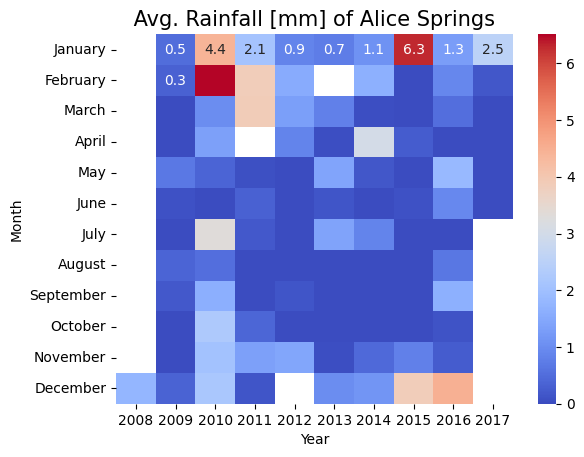

c:\Users\JASH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


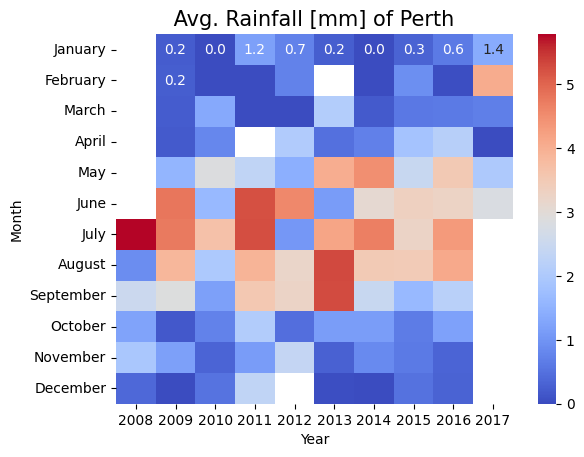

In [33]:
print_heat_matrix_avg_rain(weather_df, 'Sydney')
print_heat_matrix_avg_rain(weather_df, 'Alice Springs')
print_heat_matrix_avg_rain(weather_df, 'Perth')

**<p style="font-size:18px">Wind rose diagram</p>**

Next, we are displaying the wind rose diagram for the individual locations. We are using a function in order to easily choose the location you want to display.

In [34]:
def print_wind_rose(df, location, wind_dir, wind_speed):
# Pick all data from the location provided
    df = df.loc[df['Location'].str.contains(location)]
# Plot the wind rose
    ax = windrose.WindroseAxes.from_ax()
    ax.bar(df[wind_dir], df[wind_speed], normed=True, opening=0.8, edgecolor='white')

    if wind_dir == "WindGustDirConvert":
        ax.set_title(f"Wind Rose - Max Wind Gust of each Day over the entire records for the location {location}", fontsize=15)
    elif wind_speed == "WindSpeed3pmConvert":
        ax.set_title(f"Wind Rose - Shows the wind speed and direction at 3pm of each Day over the entire records for the location {location}")
    else:
        ax.set_title(f"Wind Rose - Shows the wind speed and direction at 9am of each Day over the entire records for the location {location}")

    ax.legend(title="Wind Speed in kmh.")
    ax.set_legend()

    plt.show()

This function needs besides the desired location also which wind should be used. For our research question we only have a look at the wind gust. The wind gust includes the strongest wind gust of the day. However, the function can still print the windrose for the other wind values as well.

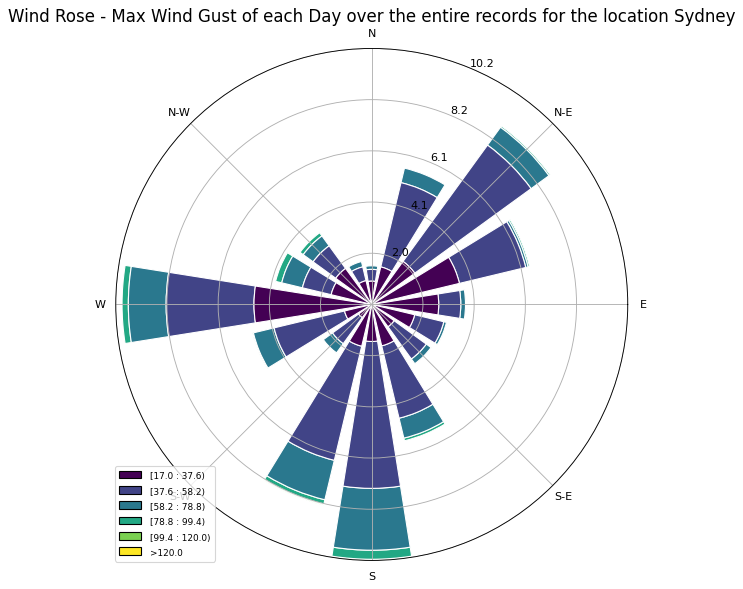

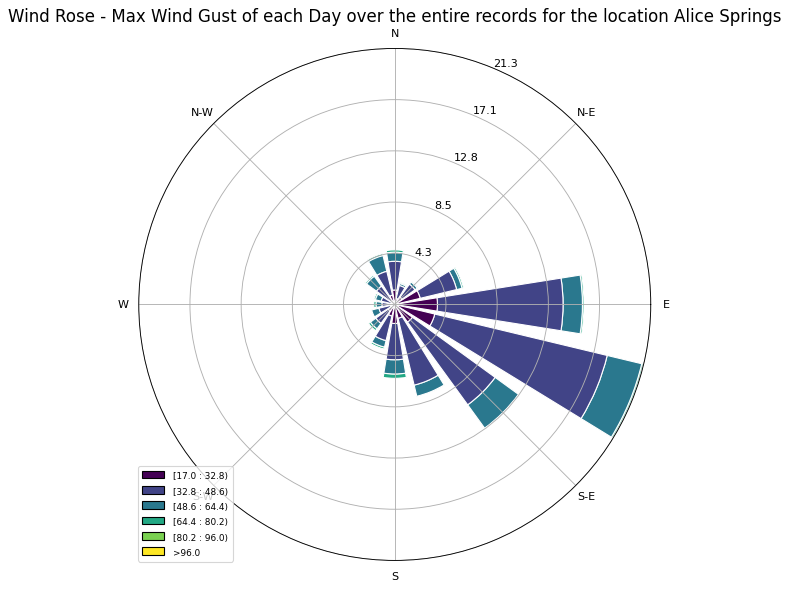

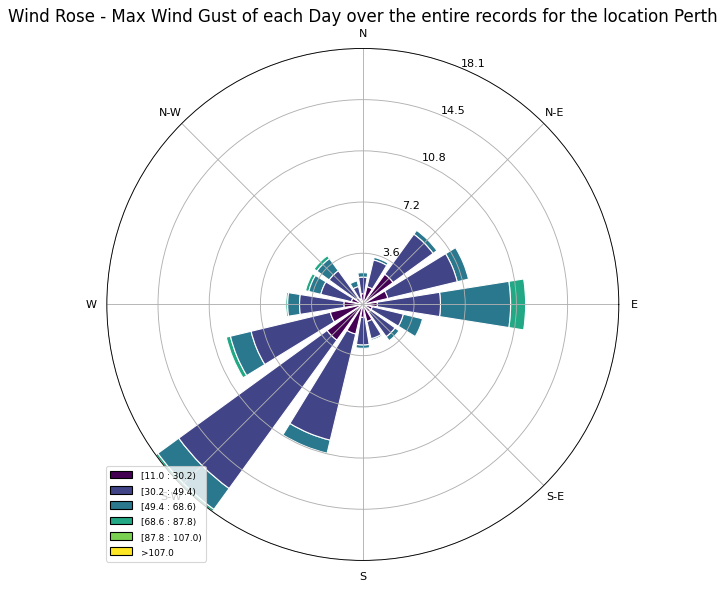

In [35]:
print_wind_rose(weather_df, 'Sydney', "WindGustDirConvert", "WindGustSpeed")
print_wind_rose(weather_df, 'Alice Springs', "WindGustDirConvert", "WindGustSpeed")
print_wind_rose(weather_df, 'Perth', "WindGustDirConvert", "WindGustSpeed")

**<p style="font-size:18px">Average rainfall by month based on Rainfall</p>**

We are showing the monthly average rainfall based on the column Rainfall for the individual locations. We are using a function in order to easily choose the location you want to display.

In [36]:
def display_avg_rain(df, location):
    rain_avg = df[df['Location'] == location].groupby(df['Month'])[
        'Rainfall'].mean()
#Plotting a line chart
    plt.plot(rain_avg.index, rain_avg.values)
    plt.xlabel('Month')
    plt.ylabel('Avg. Rainfall [mm] ')
    plt.title(f'Avg. Rainfall [mm] in {location} per Month', fontsize=15)
    plt.show()

The functions display_avg_rain is used for Sydney, Alice Springs, and Perth.

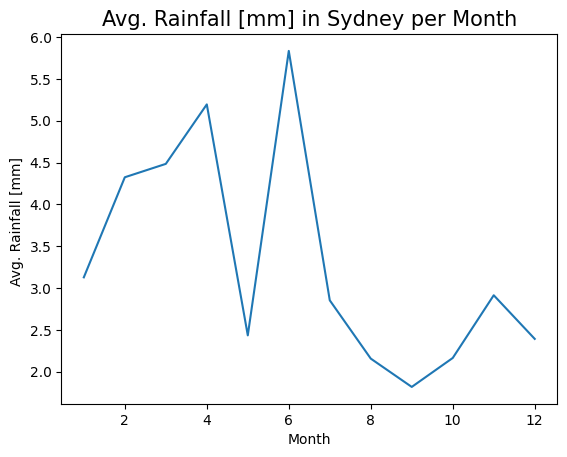

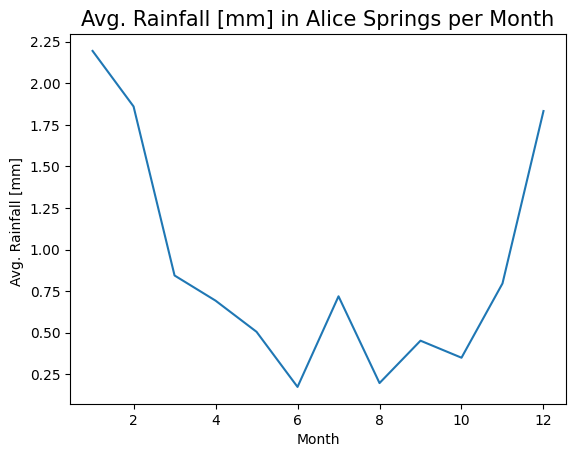

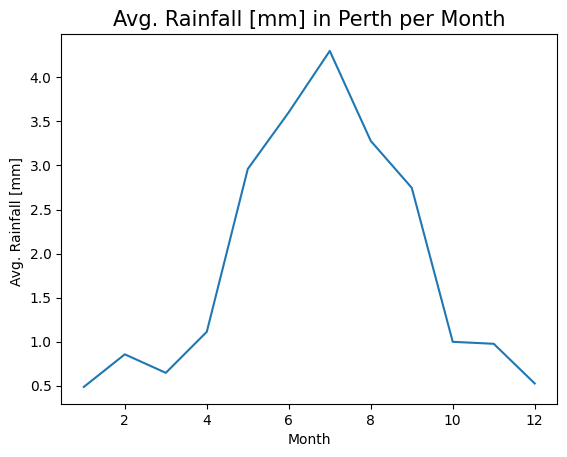

In [37]:
display_avg_rain(weather_df, 'Sydney')
display_avg_rain(weather_df, 'Alice Springs')
display_avg_rain(weather_df, 'Perth')

**<p style="font-size:18px">Average humidity per month</p>**

Now we are showing the average humidity over the months. This is based on the AverageHumidity column. We are using a function in order to easily choose the location you want to display.

In [38]:
def display_avg_humidity(df, location):
    mean_humidity = df[df['Location'] == location].groupby(df['Month'])[
        'AverageHumidity'].mean()
#Drawing a bar chart
    plt.bar(mean_humidity.index, mean_humidity.values)
    plt.xlabel('Month')
    plt.ylabel('Avg. Humidity [%] ')
    plt.title(f'Avg. Humidity [%] in {location} per Month', fontsize=15)
    plt.show()

The function display_avg_humidity is used for Sydney, Alice Springs, and Perth.

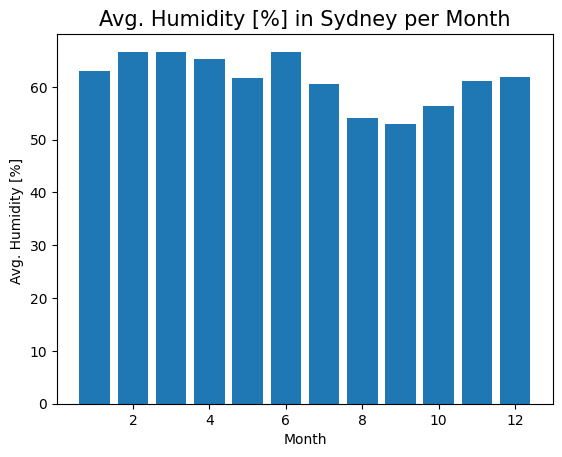

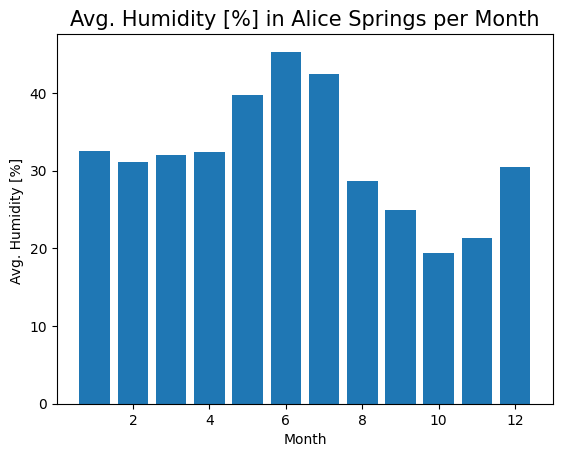

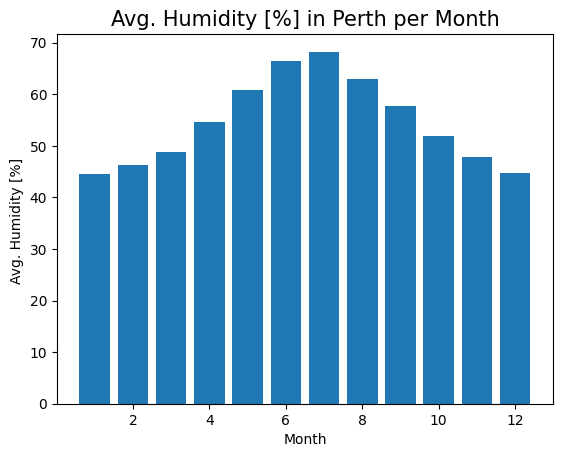

In [39]:
display_avg_humidity(weather_df, 'Sydney')
display_avg_humidity(weather_df, 'Alice Springs')
display_avg_humidity(weather_df, 'Perth')

**<p style="font-size:22px">2. Research question:</p>**

**<p style="font-size:18px">How can we predict if there is more than 1mm rain tomorrow and compare it with the given “RainTomorrow”?</p>**

In [2]:
# Import the pandas library as pd, numpy library as np, seaborn library as sns and pyplot module from matplotlib library as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data from the csv file 'weatherAUS.csv' into the pandas dataFrame 'df'
df = pd.read_csv('weatherAUS.csv')

# Print the shape of dataframe to check number of rows initially
print(df.shape)



(145460, 23)


In [4]:
# Remove rows with NaN values in all the columns in the dataframe 'df'
df = df.dropna()

# Print the shape of dataframe to check the change in number of rows
print(df.shape)

(56420, 23)


In [5]:
# Separate numeric columns for removing outliers for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through all numeric columns to find out mean and standard deviation in each column
for column in numeric_columns:
    mean = df[column].mean()
    std = df[column].std()
    # Remove outliers based on the mean and standard deviation of the column
    df = df[(df[column] - mean).abs() <= 3 * std]

# Loop through all numeric columns to check what are the range of values in each numeric column
for column in numeric_columns:
    print("Column:", column)
    print("Range:", df[column].min(), "to", df[column].max())
    print("---")

Column: MinTemp
Range: -5.3 to 29.7
---
Column: MaxTemp
Range: 4.1 to 44.6
---
Column: Rainfall
Range: 0.0 to 23.0
---
Column: Evaporation
Range: 0.0 to 16.4
---
Column: Sunshine
Range: 0.0 to 14.5
---
Column: WindGustSpeed
Range: 9.0 to 80.0
---
Column: WindSpeed9am
Range: 2.0 to 39.0
---
Column: WindSpeed3pm
Range: 2.0 to 43.0
---
Column: Humidity9am
Range: 12.0 to 100.0
---
Column: Humidity3pm
Range: 1.0 to 100.0
---
Column: Pressure9am
Range: 997.5 to 1037.7
---
Column: Pressure3pm
Range: 995.4 to 1034.9
---
Column: Cloud9am
Range: 0.0 to 8.0
---
Column: Cloud3pm
Range: 0.0 to 9.0
---
Column: Temp9am
Range: -0.7 to 37.2
---
Column: Temp3pm
Range: 3.7 to 42.6
---


In [6]:
# Print the shape of dataframe to check the change in number of rows
print(df.shape)

(52974, 23)


In [7]:

# Print the first 4 rows of the processed dataframe to check the data after final step of processing
print(df.head(4))

            Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
6049         SSW           48.0        ENE  ...        20.0         13.0   
6050           S           37.0        SSE  ...        30.0          8.0   
6052         NNE           46.0        NNE  ...        42.0         22.0   
6053         WNW           31.0        WNW  ...        37.0         22.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6049       1006.3       1004.4       2.0       5.0     26.6     33.4   
6050       1012.9       1012.1       1.0       1.0     20.3     27.0   
60

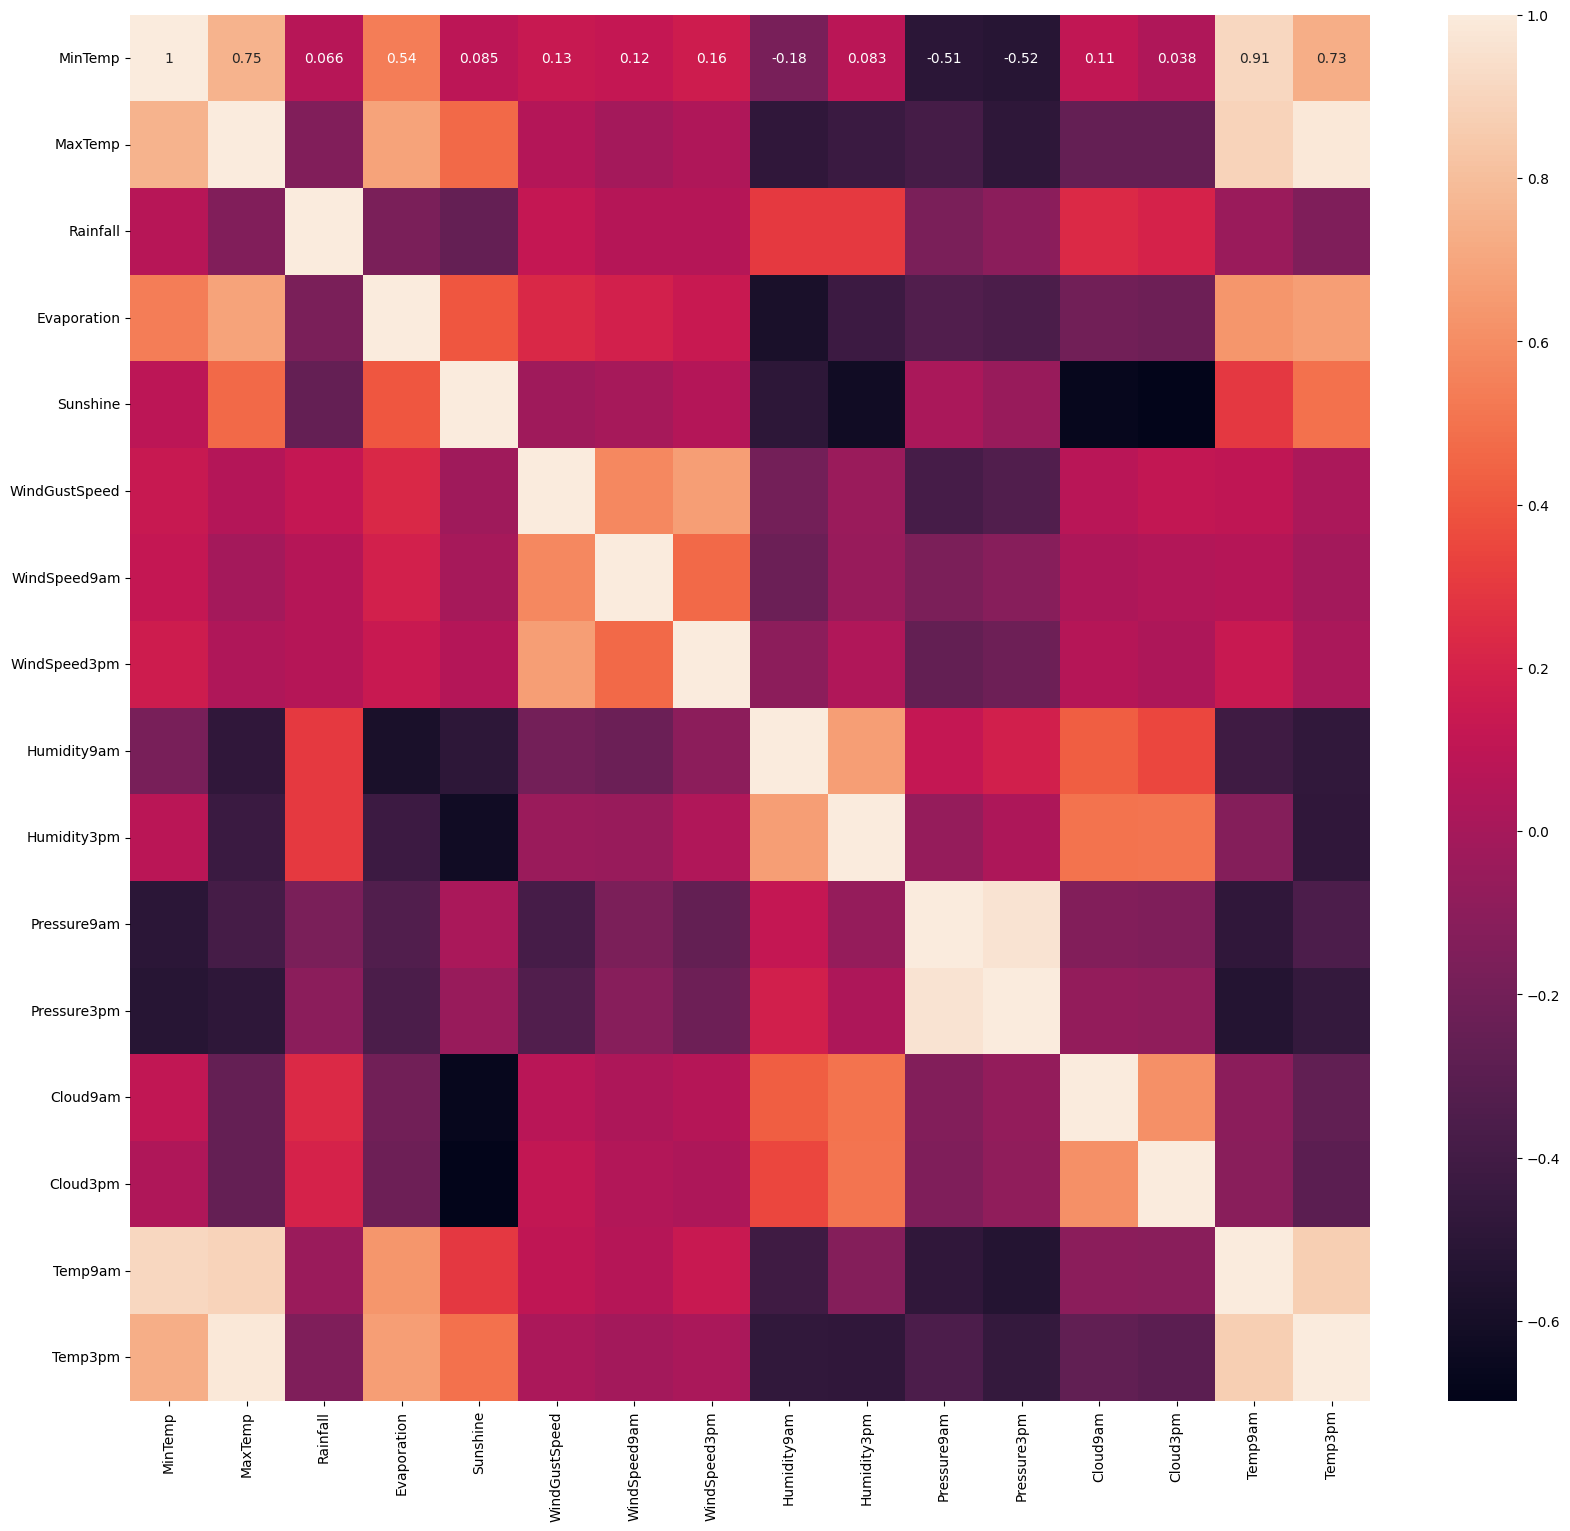

'\n# The lower the number of hours of bright sunshine, The higher the amount of rainfall recorded (Weakly correlated, -0.25)\n# The higher the humidity percentage at 9am or 3pm, The higher the amount of rainfall recorded (Weakly correlated, 0.3)\n'

In [8]:

# Creation of correlation matrix for the numeric columns
corr_matrix = df[numeric_columns].corr()

# Adjusting the figure size
plt.figure(figsize=(20, 18))

# Visualization of correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

"""
# The lower the number of hours of bright sunshine, The higher the amount of rainfall recorded (Weakly correlated, -0.25)
# The higher the humidity percentage at 9am or 3pm, The higher the amount of rainfall recorded (Weakly correlated, 0.3)
"""

In [47]:
# Load the data from the csv file 'weatherAUS.csv' into the new pandas dataFrame 'df1'
df1 = pd.read_csv('weatherAUS.csv')

# Print the shape of dataframe to check number of rows initially
print(df1.shape)

(145460, 23)


In [48]:
# Check the data type of 'Date' column of the dataframe 'df1' initially
print(df1['Date'].dtype)

object


In [49]:
# Convert the data type of the 'Date' column of the dataFrame 'df1' to datetime data type
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d')

# Check the data type of 'Date' column of the dataframe 'df1' after making changes
print(df1['Date'].dtype)

datetime64[ns]


In [50]:
# Print first 1000 rows to have basic visual idea of the data in the dataframe 'df1'
print(df1.head(1000))

          Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1   2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2   2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3   2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4   2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
..         ...      ...      ...      ...       ...          ...       ...   
995 2011-09-22   Albury      4.4     22.1       0.0          NaN       NaN   
996 2011-09-23   Albury     10.0     18.4       0.0          NaN       NaN   
997 2011-09-24   Albury      1.9     18.3       0.0          NaN       NaN   
998 2011-09-25   Albury      8.6     19.8       1.0          NaN       NaN   
999 2011-09-26   Albury      3.1     19.6       0.0          NaN       NaN   

    WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Hum

In [51]:
# Sort the dataframe 'df1' first in ascending order of 'Location' and then in the ascending order of 'Date'
df1 = df1.sort_values(by=['Location', 'Date'], ascending=[True, True])

# Print first 1000 rows again to have basic visual idea of the change in data order after sorting
print(df1.head(1000))

            Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
96320 2008-07-01  Adelaide      8.8     15.7       5.0          1.6       2.6   
96321 2008-07-02  Adelaide     12.7     15.8       0.8          1.4       7.8   
96322 2008-07-03  Adelaide      6.2     15.1       0.0          1.8       2.1   
96323 2008-07-04  Adelaide      5.3     15.9       0.0          1.4       8.0   
96324 2008-07-05  Adelaide      9.8     15.4       0.0          NaN       0.9   
...          ...       ...      ...      ...       ...          ...       ...   
97315 2011-03-23  Adelaide     14.3     18.1       8.2          3.0       0.0   
97316 2011-03-24  Adelaide     14.2     18.7      15.6          1.2       3.9   
97317 2011-03-25  Adelaide     14.1     20.8       0.6          2.2       7.1   
97318 2011-03-26  Adelaide     13.4     19.9       0.2          NaN       6.3   
97319 2011-03-27  Adelaide     14.0     21.8       0.0          NaN       6.3   

      WindGustDir  WindGust

In [52]:
# Remove rows with NaN values in the 'Rainfall' column in the dataframe 'df1'
df1.dropna(subset=["Rainfall"], inplace=True)

# Print the shape of dataframe to check number of removal of rows with NaN values from 'Rainfall' column
print(df1.shape)

(142199, 23)


In [53]:
# Group the dataframe 'df1' by the 'Location' column
grouped = df1.groupby('Location')

# Find the minimum 'Date' for each group
first_year = grouped['Date'].min()

# Print the minimum date of each 'Location'
print(first_year)

"""
Minimum date of each location is checked to see if the data for every location starts on the same date or not and make a decision on what predictive analysis method to use
"""

Location
Adelaide           2008-07-01
Albany             2008-12-01
Albury             2008-12-01
AliceSprings       2008-12-01
BadgerysCreek      2009-01-01
Ballarat           2008-12-01
Bendigo            2008-12-01
Brisbane           2008-07-01
Cairns             2008-12-01
Canberra           2007-11-01
Cobar              2009-01-01
CoffsHarbour       2009-01-01
Dartmoor           2009-03-06
Darwin             2008-07-01
GoldCoast          2008-12-01
Hobart             2008-07-01
Katherine          2013-03-01
Launceston         2008-12-01
Melbourne          2008-07-01
MelbourneAirport   2009-01-01
Mildura            2009-01-01
Moree              2009-01-01
MountGambier       2008-12-01
MountGinini        2008-12-01
Newcastle          2008-12-01
Nhil               2013-03-01
NorahHead          2009-01-01
NorfolkIsland      2009-01-01
Nuriootpa          2009-01-01
PearceRAAF         2009-01-01
Penrith            2008-12-01
Perth              2008-07-01
PerthAirport       2009-01-01
P

'\nMinimum date of each location is checked to see if the data for every location starts on the same date or not and make a decision on what predictive analysis method to use\n'

In [54]:

# Calculation of rolling 7-day average for the 'Rainfall' column by 'Location' and putting the values in a new column 'Rainfall_tomorrow'
df1['Rainfall_tomorrow'] = grouped['Rainfall'].rolling(window=7).mean().reset_index(0, drop=True)

# Defining new column 'YesNoRainfall_tomorrow' to check if calculated 'Rainfall_tomorrow' values are more than 1mm or not
df1['YesNoRainfall_tomorrow'] = ''

# Loop through 'Rainfall_tomorrow' column to find out if it calculated 'Rainfall_tomorrow' values are more than 1mm or not
for index, row in df1.iterrows():
    if pd.isna(row['Rainfall_tomorrow']):
        df1.loc[index, 'YesNoRainfall_tomorrow'] = np.nan
    elif row['Rainfall_tomorrow'] > 1:
        df1.loc[index, 'YesNoRainfall_tomorrow'] = 'Yes'
    else:
        df1.loc[index, 'YesNoRainfall_tomorrow'] = 'No'

# Print first 20 rows of the relevant columns to see the interim results
print(df1[['Date', 'Location', 'Rainfall', 'Rainfall_tomorrow', 'YesNoRainfall_tomorrow']].head(20))


            Date  Location  Rainfall  Rainfall_tomorrow YesNoRainfall_tomorrow
96320 2008-07-01  Adelaide       5.0                NaN                    NaN
96321 2008-07-02  Adelaide       0.8                NaN                    NaN
96322 2008-07-03  Adelaide       0.0                NaN                    NaN
96323 2008-07-04  Adelaide       0.0                NaN                    NaN
96324 2008-07-05  Adelaide       0.0                NaN                    NaN
96326 2008-07-07  Adelaide      16.2                NaN                    NaN
96327 2008-07-08  Adelaide      17.0           5.571429                    Yes
96328 2008-07-09  Adelaide       1.8           5.114286                    Yes
96329 2008-07-10  Adelaide       9.0           6.285714                    Yes
96330 2008-07-11  Adelaide       0.2           6.314286                    Yes
96333 2008-07-14  Adelaide       3.8           6.857143                    Yes
96334 2008-07-15  Adelaide       4.0           7.428

In [55]:
# Print a summary of the column 'YesNoRainfall_tomorrow' of the DataFrame 'df1'
print(df1['YesNoRainfall_tomorrow'].describe())

count     141905
unique         2
top           No
freq       75520
Name: YesNoRainfall_tomorrow, dtype: object


In [56]:
# Defining new column 'Prediction' to check if found out results of 'YesNoRainfall_tomorrow' are matching with given results of 'RainTomorrow'
df1['Prediction'] = ''

# Loop through 'YesNoRainfall_tomorrow' column and 'RainTomorrow' column to find out if they match or not
for index, row in df1.iterrows():
    if pd.isna(['YesNoRainfall_tomorrow']):
        df1.loc[index, 'Prediction'] = np.nan
    elif pd.isna(['RainTomorrow']):
        df1.loc[index, 'Prediction'] = np.nan
    elif ((row['YesNoRainfall_tomorrow'] == 'Yes') and (row['RainTomorrow'] == 'Yes')) or ((row['YesNoRainfall_tomorrow'] == 'No') and (row['RainTomorrow'] == 'No')):
        df1.loc[index, 'Prediction'] = 'Correct'
    elif ((row['YesNoRainfall_tomorrow'] == 'No') and (row['RainTomorrow'] == 'Yes')) or ((row['YesNoRainfall_tomorrow'] == 'Yes') and (row['RainTomorrow'] == 'No')):
        df1.loc[index, 'Prediction'] = 'Incorrect'

# Print first 20 rows of the relevant columns to see the results
print(df1[['Date', 'Location', 'Rainfall_tomorrow', 'YesNoRainfall_tomorrow', 'Prediction']].head(20))

            Date  Location  Rainfall_tomorrow YesNoRainfall_tomorrow  \
96320 2008-07-01  Adelaide                NaN                    NaN   
96321 2008-07-02  Adelaide                NaN                    NaN   
96322 2008-07-03  Adelaide                NaN                    NaN   
96323 2008-07-04  Adelaide                NaN                    NaN   
96324 2008-07-05  Adelaide                NaN                    NaN   
96326 2008-07-07  Adelaide                NaN                    NaN   
96327 2008-07-08  Adelaide           5.571429                    Yes   
96328 2008-07-09  Adelaide           5.114286                    Yes   
96329 2008-07-10  Adelaide           6.285714                    Yes   
96330 2008-07-11  Adelaide           6.314286                    Yes   
96333 2008-07-14  Adelaide           6.857143                    Yes   
96334 2008-07-15  Adelaide           7.428571                    Yes   
96335 2008-07-16  Adelaide           5.142857                   

In [57]:
# Print a summary of the column 'Prediction' of the DataFrame 'df1'
print(df1['Prediction'].describe())

count      142199
unique          3
top       Correct
freq        83860
Name: Prediction, dtype: object
